<a href="https://colab.research.google.com/github/Megs130805/machine-learning/blob/main/ML_PROJECT_SHEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: Mountpoint must not already contain files

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/archive (7)/PlantVillage/'


In [ ]:
import os

print(os.listdir(dataset_path))



['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Potato___healthy', 'Potato___Late_blight', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight']


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/archive (7)/PlantVillage/" /content/
dataset_path = "/content/PlantVillage/"



In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
original_dir = "/content/PlantVillage/"
test_dir = "/content/PlantVillage_test/"

os.makedirs(test_dir, exist_ok=True)


In [ ]:
for class_name in os.listdir(original_dir):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)
    n_test = int(0.1 * len(images))  # 10% of images

    test_images = images[:n_test]

    # create class folder in test_dir
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir, exist_ok=True)

    # move images to test folder
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))


In [ ]:
img_size = (224, 224)
batch_size = 32

# Train + Validation
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.125  # ~12.5% of remaining images for validation
)

train_generator = train_val_datagen.flow_from_directory(
    original_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    color_mode='rgb'
)

val_generator = train_val_datagen.flow_from_directory(
    original_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    color_mode='rgb'
)

# Test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False
)



Found 16262 images belonging to 15 classes.
Found 2318 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load pretrained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers for feature extraction

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Complete model
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 258s 475ms/step - accuracy: 0.5801 - loss: 1.3370 - val_accuracy: 0.8361 - val_loss: 0.4970
Epoch 2/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 216s 425ms/step - accuracy: 0.8062 - loss: 0.5748 - val_accuracy: 0.8499 - val_loss: 0.4195
Epoch 3/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8323 - loss: 0.5005 - val_accuracy: 0.8645 - val_loss: 0.3775
Epoch 4/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8511 - loss: 0.4422 - val_accuracy: 0.8796 - val_loss: 0.3596
Epoch 5/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 215s 422ms/step - accuracy: 0.8580 - loss: 0.4114 - val_accuracy: 0.8788 - val_loss: 0.3550
Epoch 6/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 421ms/step - accuracy: 0.8654 - loss: 0.3901 - val_accuracy: 0.8891 - val_loss: 0.3319
Epoch 7/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8643 - loss: 0.3868 - val_accuracy: 0.9012 - val_loss: 0.2914
Epoch 8/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 214s 420ms/step - accuracy: 0.8799 -

In [ ]:
# Unfreeze last 50 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)



In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")



65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9293 - loss: 0.2038
Test Accuracy: 91.21%


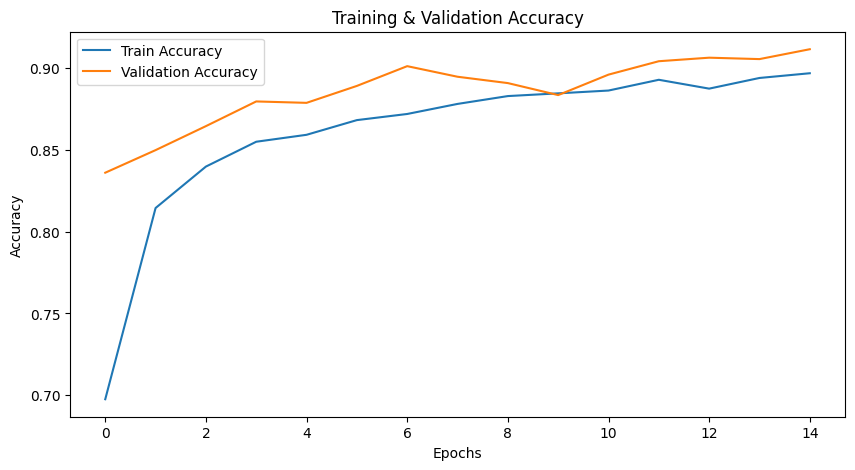

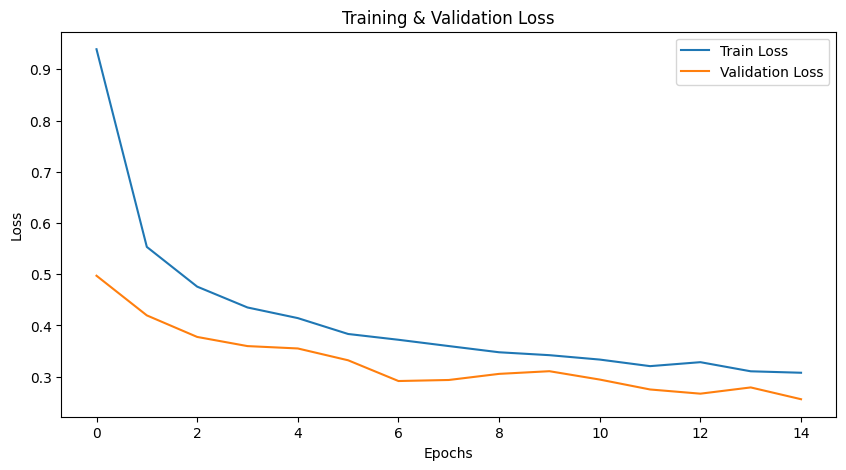

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Optional: plot loss as well
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
model.save('/content/plant_disease_mobilenet_color.h5')
# Optional: copy to Drive
!cp /content/plant_disease_mobilenet_color.h5 "/content/drive/MyDrive/Colab Notebooks/"


In [ ]:
from google.colab import drive
drive.flush_and_unmount()




Drive not mounted, so nothing to flush and unmount.


In [ ]:
!fusermount -u /content/drive


fusermount: failed to unmount /content/drive: Invalid argument


In [ ]:
!rm -rf /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import os

local_base = "/content/PlantVillage/"

# Delete mistakenly included folders
shutil.rmtree(os.path.join(local_base, "PlantVillage_Gray"), ignore_errors=True)
shutil.rmtree(os.path.join(local_base, "PlantVillage_Segmented"), ignore_errors=True)

print("Deleted erroneous folders inside local_base")


Deleted erroneous folders inside local_base


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print("Drive unmounted successfully.")


Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.


In [ ]:
# -------------------------------
# Step 0: Mount Google Drive
# -------------------------------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# -------------------------------
# Step 1: Import libraries
# -------------------------------
import os
import shutil
import cv2
from tqdm import tqdm

# -------------------------------
# Step 2: Define paths
# -------------------------------
# Original dataset in Drive
original_dir = "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/archive (7)/PlantVillage/"

# Local directories for fast processing
local_base = "/content/PlantVillage/"
gray_dir = os.path.join(local_base, "PlantVillage_Gray")
segmented_dir = os.path.join(local_base, "PlantVillage_Segmented")

# Remove old output dirs if they exist
shutil.rmtree(gray_dir, ignore_errors=True)
shutil.rmtree(segmented_dir, ignore_errors=True)

# Make fresh output dirs
os.makedirs(gray_dir, exist_ok=True)
os.makedirs(segmented_dir, exist_ok=True)

# -------------------------------
# Step 3: Copy original dataset to /content/
# -------------------------------
for class_name in os.listdir(original_dir):
    src = os.path.join(original_dir, class_name)
    dst = os.path.join(local_base, class_name)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)

# -------------------------------
# Step 4: Preprocess images
# -------------------------------
output_dirs = ["PlantVillage_Gray", "PlantVillage_Segmented"]

for class_name in tqdm(os.listdir(local_base), desc="Processing classes"):
    if class_name in output_dirs:
        continue  # skip output folders

    class_path = os.path.join(local_base, class_name)
    if not os.path.isdir(class_path):
        continue

    # Create class folders in output directories
    os.makedirs(os.path.join(gray_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(segmented_dir, class_name), exist_ok=True)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # ---------- Grayscale ----------
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(gray_dir, class_name, img_name), gray)

        # ---------- Segmentation (green leaf mask) ----------
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        lower = (25, 40, 40)
        upper = (85, 255, 255)
        mask = cv2.inRange(hsv, lower, upper)
        result = cv2.bitwise_and(img, img, mask=mask)
        cv2.imwrite(os.path.join(segmented_dir, class_name, img_name), result)

# -------------------------------
# Step 5: Verify classes
# -------------------------------
print("Grayscale classes:", sorted(os.listdir(gray_dir)))
print("Segmented classes:", sorted(os.listdir(segmented_dir)))

# -------------------------------
# Step 6: Copy processed datasets back to Drive
# -------------------------------
drive_base = "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/"

shutil.copytree(gray_dir, os.path.join(drive_base, "PlantVillage_Gray"), dirs_exist_ok=True)
shutil.copytree(segmented_dir, os.path.join(drive_base, "PlantVillage_Segmented"), dirs_exist_ok=True)

print("✅ Preprocessing complete! Grayscale and segmented datasets are ready in /content/ and Drive.")


Mounted at /content/drive


Processing classes: 100%|██████████| 17/17 [00:50<00:00,  2.97s/it]


Grayscale classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Segmented classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
✅ Preprocessing complete! Grayscale and segmented datasets are ready in /content/ and Drive.


In [ ]:
import os

gray_dir = "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/PlantVillage_Gray"
segmented_dir = "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/PlantVillage_Segmented"

print("Grayscale classes:", sorted(os.listdir(gray_dir)))
print("Segmented classes:", sorted(os.listdir(segmented_dir)))

print("Number of Grayscale classes:", len(os.listdir(gray_dir)))
print("Number of Segmented classes:", len(os.listdir(segmented_dir)))



Grayscale classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Segmented classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Number of Grayscale classes: 15
Number of Segmented classes: 15


In [ ]:
for class_name in sorted(os.listdir(gray_dir)):
    class_path = os.path.join(gray_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Grayscale - {class_name}: {num_images} images")

for class_name in sorted(os.listdir(segmented_dir)):
    class_path = os.path.join(segmented_dir, class_name)
    num_images = len(os.listdir(class_path))
    print(f"Segmented - {class_name}: {num_images} images")


Grayscale - Pepper__bell___Bacterial_spot: 997 images
Grayscale - Pepper__bell___healthy: 1478 images
Grayscale - Potato___Early_blight: 1000 images
Grayscale - Potato___Late_blight: 1000 images
Grayscale - Potato___healthy: 152 images
Grayscale - Tomato_Bacterial_spot: 2127 images
Grayscale - Tomato_Early_blight: 1000 images
Grayscale - Tomato_Late_blight: 1909 images
Grayscale - Tomato_Leaf_Mold: 952 images
Grayscale - Tomato_Septoria_leaf_spot: 1771 images
Grayscale - Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Grayscale - Tomato__Target_Spot: 1404 images
Grayscale - Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images
Grayscale - Tomato__Tomato_mosaic_virus: 373 images
Grayscale - Tomato_healthy: 1591 images
Segmented - Pepper__bell___Bacterial_spot: 997 images
Segmented - Pepper__bell___healthy: 1478 images
Segmented - Potato___Early_blight: 1000 images
Segmented - Potato___Late_blight: 1000 images
Segmented - Potato___healthy: 152 images
Segmented - Tomato_Bacterial_sp

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print("Drive unmounted successfully.")


Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/PlantVillage_Gray" "/content/"
!cp -r "/content/drive/MyDrive/Colab Notebooks/plant_village_datatset/PlantVillage_Segmented" "/content/"


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to grayscale dataset in local storage
gray_dir = "/content/PlantVillage_Gray"

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    gray_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    gray_dir,
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load pretrained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers for feature extraction

# Convert grayscale to 3-channel before passing into MobileNetV2
inputs = Input(shape=(224,224,1))
x = Concatenate()([inputs, inputs, inputs])
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Complete model
model = Model(inputs=inputs, outputs=predictions)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)



Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


517/517 ━━━━━━━━━━━━━━━━━━━━ 71s 103ms/step - accuracy: 0.6090 - loss: 1.2382 - val_accuracy: 0.8341 - val_loss: 0.5008
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8094 - loss: 0.5627 - val_accuracy: 0.8532 - val_loss: 0.4253
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8455 - loss: 0.4651 - val_accuracy: 0.8464 - val_loss: 0.4305
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8603 - loss: 0.4177 - val_accuracy: 0.8624 - val_loss: 0.4032
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - accuracy: 0.8792 - loss: 0.3590 - val_accuracy: 0.8777 - val_loss: 0.3577
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step - accuracy: 0.8926 - loss: 0.3147 - val_accuracy: 0.8775 - val_loss: 0.3548
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step - accuracy: 0.8982 - loss: 0.2999 - val_accuracy: 0.8787 - val_loss: 0.3518
Epoch 8/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9009 - loss: 0.2850 - val_accura

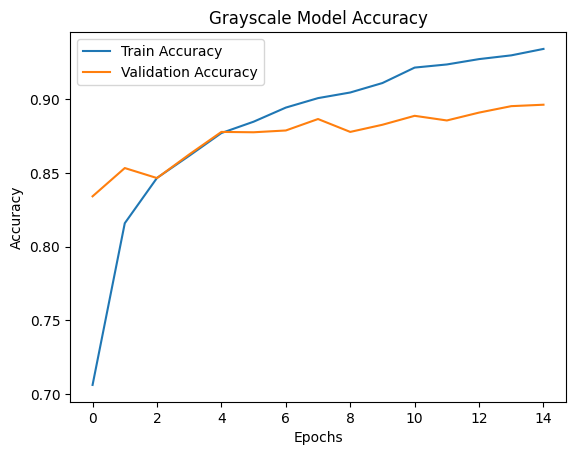

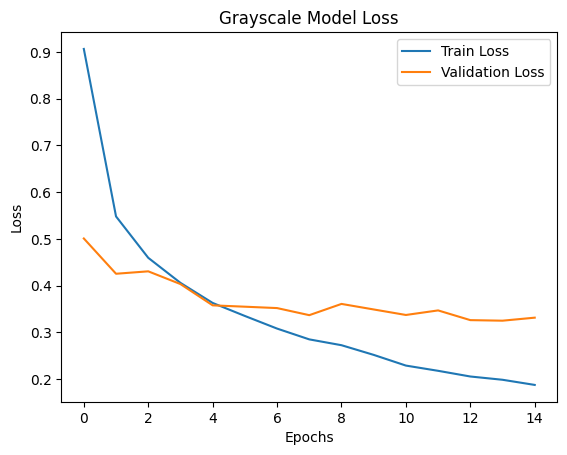

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grayscale Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grayscale Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to segmented dataset in local storage
segmented_dir = "/content/PlantVillage_Segmented"

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    segmented_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    segmented_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load pretrained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers for feature extraction

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Epoch 1/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.6304 - loss: 1.1718 - val_accuracy: 0.8561 - val_loss: 0.4461
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.8399 - loss: 0.4844 - val_accuracy: 0.8775 - val_loss: 0.3633
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.8612 - loss: 0.4045 - val_accuracy: 0.8918 - val_loss: 0.3199
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.8904 - loss: 0.3244 - val_accuracy: 0.8918 - val_loss: 0.3050
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 36s 69ms/step - accuracy: 0.8973 - loss: 0.3021 - val_accuracy: 0.8959 - val_loss: 0.2989
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.9054 - loss: 0.2754 - val_accuracy: 0.9081 - val_loss: 0.2690
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.9175 - loss: 0.2450 - val_accuracy: 0.8940 - val_loss: 0.3017
Epo

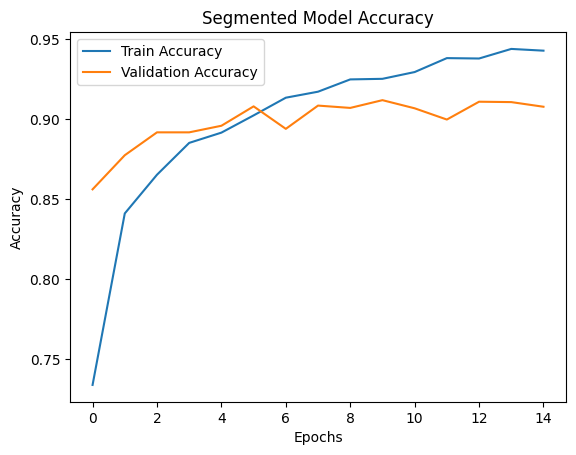

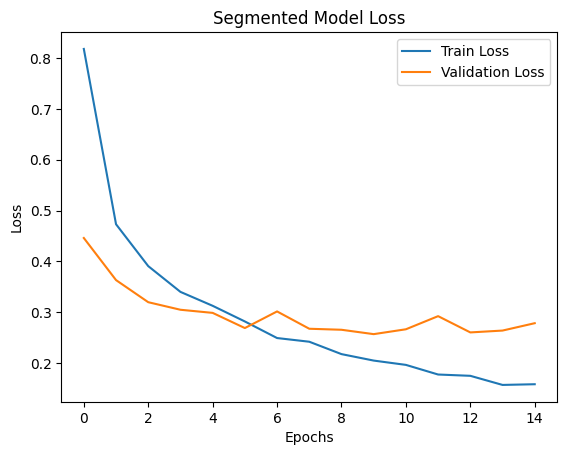

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Segmented Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Segmented Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
